# 分析結果を集計するノートブック
- 一旦AUCだけで比較してみる
- output/ファイルから各手法の各データの結果をまとめる
- それらの平均をまとめる
- 分散分析とかグラフとかにして表示する

In [1]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ex_name = '0513'

In [3]:
file_list = glob(f'../data/output/{ex_name}*')

In [4]:
e_index = ['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS']

method = list(set([file.split('\\')[1].split('_')[1] for file in file_list]))
method = list(set(method)- set(e_index))
method = ['MTSBagImpAgg', 'WMTSBagImpAgg', 'MTGSBagImpAgg', 'WMTGSBagImpAgg']

In [5]:
data = list(set([file.split('\\')[1].split('_')[2] for file in file_list]))
data = ['car', 'cancer', 'letter', 'wine', 'abalone']

In [6]:
e_index = ['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS']
multi_columns = [
    np.array(
        [method[0]] * 2 + 
        [method[1]] * 2 + 
        [method[2]] * 2 + 
        [method[3]] * 2 
        # +
        # [method[4]] * 2 +
        # [method[5]] * 2 
        ),
    np.array(["mean", "std"] * len(method))
]

AUC


MTSBagImpAgg           WMTSBagImpAgg           MTGSBagImpAgg  \
                   mean       std          mean       std          mean   
car            0.983431  0.004282       0.96725  0.005593      0.990212   
cancer         0.978521  0.014813      0.983677  0.008763      0.982987   
letter         0.970714  0.008914      0.957546  0.010755       0.97915   
wine           0.997178  0.003898      0.994412  0.008709       0.99812   
abalone        0.989643  0.002511      0.988653   0.00514      0.984188   
whole_mean     0.983898  0.006883      0.978308  0.007792      0.986932   

                     WMTGSBagImpAgg            
                 std           mean       std  
car         0.003503       0.984621  0.006403  
cancer      0.009502       0.983794  0.009111  
letter      0.007377       0.984107   0.00546  
wine        0.004045       0.997935  0.004253  
abalone     0.006891       0.985232  0.004823  
whole_mean  0.006264       0.987138   0.00601

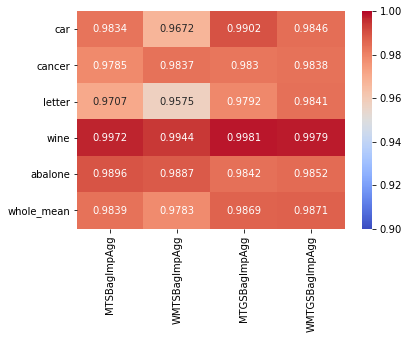

accuracy


MTSBagImpAgg           WMTSBagImpAgg           MTGSBagImpAgg  \
                   mean       std          mean       std          mean   
car            0.960405  0.009043      0.930636  0.012781      0.956936   
cancer         0.944286  0.026684      0.947857  0.026524      0.947857   
letter          0.98365  0.003208       0.97255  0.010163      0.984975   
wine           0.966667  0.021911          0.95  0.034146         0.975   
abalone        0.976435  0.006721      0.977153  0.004492      0.979545   
whole_mean     0.966288  0.013513      0.955639  0.017621      0.968863   

                     WMTGSBagImpAgg            
                 std           mean       std  
car         0.011756       0.955491  0.013638  
cancer      0.026093          0.955  0.018148  
letter      0.002644       0.984725  0.002158  
wine        0.020496       0.977778  0.025526  
abalone     0.004631       0.982057  0.002704  
whole_mean  0.013124        0.97101  0.012435

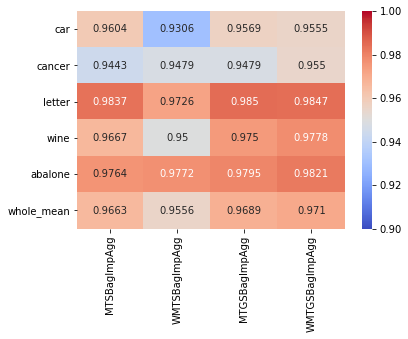

recall


MTSBagImpAgg           WMTSBagImpAgg           MTGSBagImpAgg  \
                   mean       std          mean       std          mean   
car                 1.0       0.0       0.88075  0.180332      0.952521   
cancer         0.974292  0.031045      0.964594  0.035568      0.943175   
letter          0.65137  0.064726      0.687927   0.04099      0.677958   
wine           0.952222  0.050998      0.956061  0.074381      0.972639   
abalone        0.839344  0.106722      0.849227  0.132062      0.675069   
whole_mean     0.883446  0.050698      0.867712  0.092667      0.844272   

                     WMTGSBagImpAgg            
                 std           mean       std  
car         0.078427       0.884069  0.113734  
cancer      0.057011       0.934671  0.055823  
letter      0.046203        0.67011  0.042972  
wine        0.045663           0.99  0.031623  
abalone     0.154139       0.734071  0.115622  
whole_mean  0.076288       0.842584  0.071955

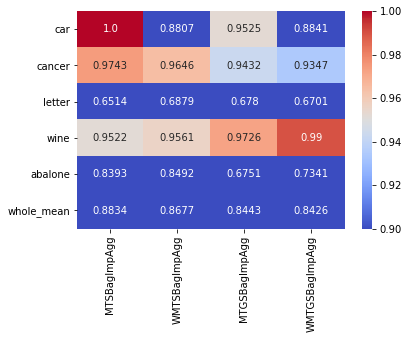

Specificity


MTSBagImpAgg           WMTSBagImpAgg           MTGSBagImpAgg  \
                   mean       std          mean       std          mean   
car            0.958829  0.009557      0.932325  0.018934      0.957867   
cancer         0.928255  0.039737      0.940401  0.037639      0.949375   
letter         0.997062  0.001806      0.984153  0.011529      0.997475   
wine           0.972108  0.033314      0.950709  0.041452      0.978525   
abalone        0.978907  0.007951      0.979569  0.005823      0.984428   
whole_mean     0.967032  0.018473      0.957431  0.023076      0.973534   

                     WMTGSBagImpAgg            
                 std           mean       std  
car         0.013559        0.95819  0.014923  
cancer      0.023037       0.967127  0.014642  
letter      0.001362       0.997609  0.002398  
wine        0.025553       0.973095  0.037636  
abalone     0.006182       0.986498  0.003062  
whole_mean  0.013939       0.976504  0.014532

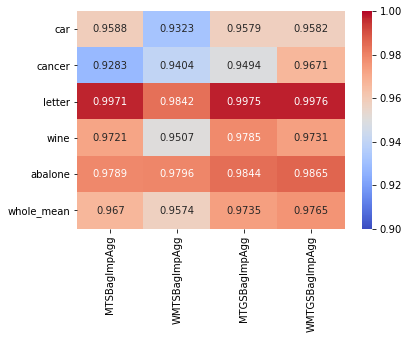

precision


MTSBagImpAgg           WMTSBagImpAgg           MTGSBagImpAgg  \
                   mean       std          mean       std          mean   
car            0.481146  0.064522       0.34778  0.072512      0.488871   
cancer          0.87373  0.044929      0.891973  0.064784      0.903198   
letter         0.901857  0.054852      0.681663  0.171629      0.917073   
wine             0.9375  0.076143      0.877258  0.092041      0.923088   
abalone        0.438628  0.068083      0.417142  0.092671      0.430808   
whole_mean     0.726572  0.061706      0.643163  0.098727      0.732608   

                     WMTGSBagImpAgg            
                 std           mean       std  
car         0.118046       0.467614  0.093591  
cancer      0.042879       0.938373   0.02625  
letter      0.041531       0.923367  0.073527  
wine        0.091955       0.936508  0.076193  
abalone     0.099865       0.485892  0.122203  
whole_mean  0.078855       0.750351  0.078353

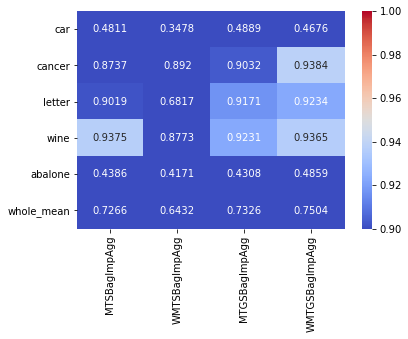

gmeans


MTSBagImpAgg           WMTSBagImpAgg           MTGSBagImpAgg  \
                   mean       std          mean       std          mean   
car            0.979187   0.00488      0.900188  0.094631      0.954307   
cancer         0.950722   0.02716       0.95205  0.024091      0.945864   
letter         0.804981  0.040104      0.822379  0.021853      0.821914   
wine           0.961506  0.024295      0.952386  0.040605      0.975208   
abalone        0.904449   0.05819      0.909309  0.071659      0.810523   
whole_mean     0.920169  0.030926      0.907262  0.050568      0.901563   

                     WMTGSBagImpAgg            
                 std           mean       std  
car         0.038201       0.918452  0.058432  
cancer      0.032929       0.950284  0.026981  
letter      0.028429       0.817242   0.02599  
wine        0.024589       0.981153  0.021956  
abalone     0.088372       0.848637  0.066104  
whole_mean  0.042504       0.903154  0.039892

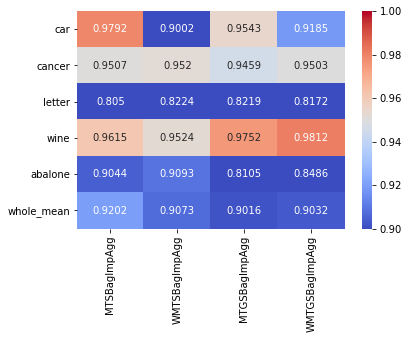

RS


MTSBagImpAgg           WMTSBagImpAgg           MTGSBagImpAgg  \
                   mean       std          mean       std          mean   
car            1.043032  0.010392      0.948105  0.205793         0.995   
cancer         1.051249   0.05444      1.027476  0.060824      0.993759   
letter         0.653305  0.065053      0.699391  0.047663       0.67965   
wine           0.981304  0.074154      1.007827  0.095205      0.994798   
abalone        0.858068  0.113577      0.867394  0.137405      0.686376   
whole_mean     0.917392  0.063523      0.910039  0.109378      0.869917   

                     WMTGSBagImpAgg            
                 std           mean       std  
car         0.087669       0.923383  0.124359  
cancer      0.061267       0.966907  0.064228  
letter      0.045935       0.671734  0.043323  
wine        0.057595       1.019122  0.058663  
abalone     0.160678       0.744169  0.117665  
whole_mean  0.082629       0.865063  0.081647

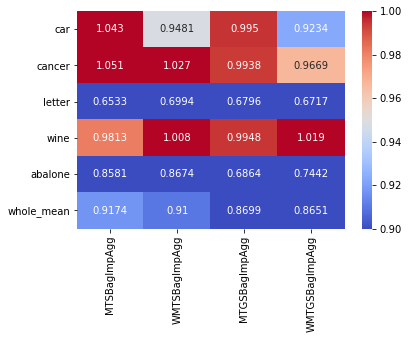

In [11]:
for e in e_index:
    index_result_df = pd.DataFrame(
                index=data,
                columns=multi_columns,
                )
    for m in method:
        for d in data:     
            df = pd.read_csv(f'../data/output/{ex_name}_{m}_{d}_result.csv', index_col=0)
            index_result_df.loc[d, m] = [df[e].mean(), df[e].std()]
    index_result_df.loc['whole_mean'] = index_result_df.mean(axis=0)
    print(e)
    display(index_result_df)
    index_result_df.to_csv(f'../data/output/{ex_name}_{e}_score.csv')
    a = index_result_df.T[index_result_df.T.index.get_level_values(1) == 'mean']
    a = a.reset_index(level=1).drop('level_1', axis=1)
    sns.heatmap(a.T.astype(float), annot=True, fmt='.4', cmap='coolwarm', vmin=0.9000, vmax=1.0000)
    plt.show()